# Machine Learning Classification with Keras
### Professor Gemini's Complete Lecture Notebook

This notebook covers:
1. **Binary** (One choice out of two)
2. **Multi-Class** (One choice out of many)
3. **Multi-Label** (Multiple tags at once)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_circles, make_blobs, make_multilabel_classification
from sklearn.model_selection import train_test_split

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in, verbose=0)
    if y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        y_pred = np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.title(title)
    plt.show()

## 1. Binary Classification
**Logic:** Is it A or B? 
**Config:** 1 Neuron | Sigmoid | Binary Crossentropy

c:\Nemeno\3rd year\2nd sem\IS2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Binary Classification Trained.


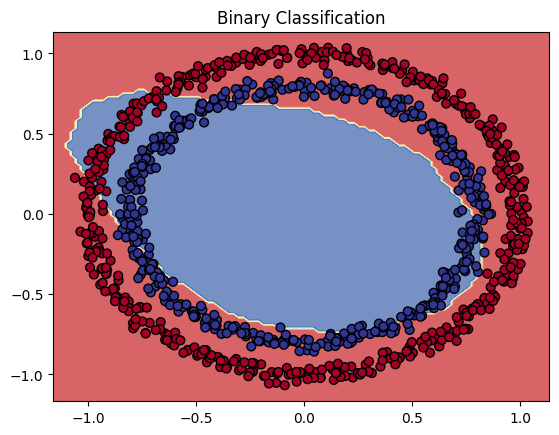

In [2]:
X_bin, y_bin = make_circles(n_samples=1000, noise=0.03, random_state=42)
model_bin = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(2,)),
    layers.Dense(1, activation='sigmoid')
])
model_bin.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_bin.fit(X_bin, y_bin, epochs=20, verbose=0)
print("Binary Classification Trained.")
plot_decision_boundary(model_bin, X_bin, y_bin, "Binary Classification")

## 2. Multi-Class Classification
**Logic:** Is it A, B, OR C? (Only one) 
**Config:** N Neurons | Softmax | Sparse Categorical Crossentropy

Multi-Class Classification Trained.


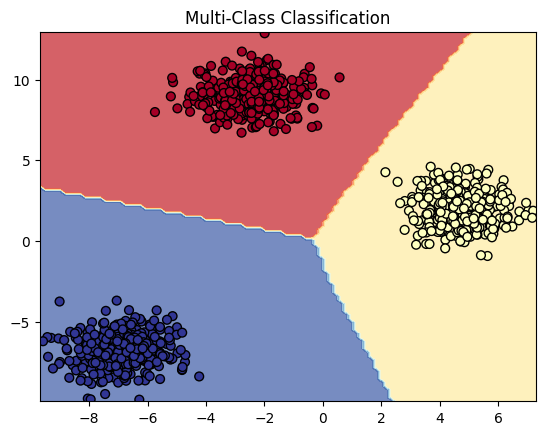

In [4]:
X_multi, y_multi = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42)
model_multi = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(2,)),
    layers.Dense(3, activation='softmax')
])
model_multi.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_multi.fit(X_multi, y_multi, epochs=20, verbose=0)
print("Multi-Class Classification Trained.")
plot_decision_boundary(model_multi, X_multi, y_multi, "Multi-Class Classification")

## 3. Multi-Label Classification
**Logic:** Could it be A AND B? 
**Config:** N Neurons | Sigmoid | Binary Crossentropy

In [5]:
# Generate 1000 samples with 10 features and 3 possible tags
X_ml, y_ml = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=42)

model_ml = models.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10,)),
    layers.Dense(32, activation='relu'),
    # Note: Sigmoid here allows multiple neurons to be 'active' simultaneously
    layers.Dense(3, activation='sigmoid')
])

model_ml.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
model_ml.fit(X_ml, y_ml, epochs=30, verbose=0)

# Show a prediction example
sample = X_ml[0].reshape(1, -1)
pred = model_ml.predict(sample)
print(f"Raw Probabilities for sample 0: {pred[0]}")
print(f"True Labels for sample 0: {y_ml[0]}")
print(f"Predicted Labels (threshold 0.5): {(pred > 0.5).astype(int)[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Raw Probabilities for sample 0: [0.9451019  0.9984112  0.04824891]
True Labels for sample 0: [1 1 0]
Predicted Labels (threshold 0.5): [1 1 0]
